In [ ]:
import string                                                                      # Dealing with strings

import numpy as np                                                                 # Dealing with numbers

import pandas as pd                                                                # Dealing with dataframes

import nltk                                                                        # natural language processing
from nltk.corpus import stopwords                                                  # words that doesn't add any meaning ['like', 'the', 'is']
from nltk.stem.porter import PorterStemmer                                         # reduces words to their root

from sklearn.feature_extraction.text import  CountVectorizer                       # convert text for numerical data for machine learning

from sklearn.model_selection import train_test_split                               # to split the data set to [training part | testing part]
#### import Random Forest
from sklearn.ensemble import RandomForestClassifier                                #

# import svm
from sklearn.svm import SVC

# import naive bayes
from sklearn.naive_bayes import MultinomialNB



nltk.download('stopwords')                                                         # Downloading the stop words



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv("/content/sample_data/emails.csv")                                # loading the data
df.text.iloc[2]                                                                    # to see sample of data

'Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate .  this offer is being extended to you unconditionally and your credit is in no way a factor .  to take advantage of this limited time opportunity  all we ask is that you visit our website and complete  the 1 minute post approval form  look foward to hearing from you ,  dorcas pittman'

In [ ]:
df.info()                                                                         # we have non-null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
df.head()                                                                        # first 5 elements

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.tail()                                                                        # last 5 elements

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [ ]:
stemmer = PorterStemmer()

print( stemmer.stem("Congratulations") )
print( stemmer.stem("Fundamentals" ) )

# Here we are showing an example how porterStemmer reduces words to their root

congratul
fundament


In [ ]:
filtered = []                                                                     # This is an empty list at first that will store the filterd text

stopwords_set = set(stopwords.words("english"))                                 # english words that doesn't matter


for i in range (len(df)):
  text = df['text'].iloc[i].lower()                                             # lower case the text
  text = text.translate(str.maketrans('', '', string.punctuation)).split()      # remove punctuation
  text = [stemmer.stem(word) for word in text if word not in stopwords_set]     # stem every word and removes stopwords [indvidual words]
  text = ' '.join(text)                                                         # joining the text again to complete sentece
  filtered.append(text)                                                          # adding the filtered sentence to filtered list


In [ ]:
filtered[0] # showing the difference between the non filtered and filtered text

'subject natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest'

In [ ]:
df.text[0] # showing the difference between the non filtered and filtered text

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [ ]:
vectorizer = CountVectorizer()                               # to convert text to 0 and 1

X = vectorizer.fit_transform(filtered).toarray()             # x now is 0 , 1 instead of text

y = df.spam                                                  # y = 1 spam, 0 no spam


In [ ]:
## make x_train , x_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
model.score(X_test, y_test)

0.9895287958115183

In [ ]:
email_to_classify = df.text.values[10]

In [ ]:
df.spam.values[10]

1

In [ ]:
email_text = email_to_classify.lower().translate(str.maketrans('', '', string.punctuation)).split()
email_text = [stemmer.stem(word) for word in email_text if word not in stopwords_set]
email_text = ' '.join(email_text)

email_corpus = [email_text]

X_email = vectorizer.transform(email_corpus)


In [ ]:
model.predict(X_email)

array([1])

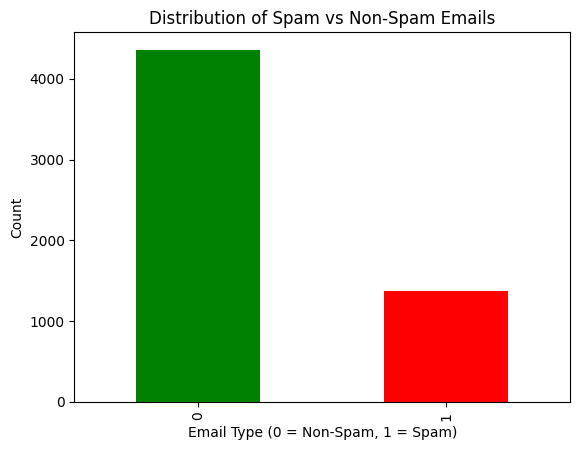

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the distribution of spam vs non-spam emails
df['spam'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Email Type (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Count')
plt.show()


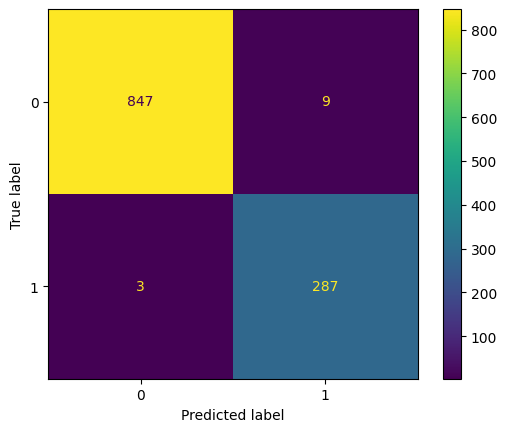

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = model.predict(X_test)                                                       # TP                                  # FP

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix                                                           # FN                                   #TN
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
# Function to classify user input
def classify_email(text):
    # Preprocess the email just like the training data
    email_text = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    email_text = [stemmer.stem(word) for word in email_text if word not in stopwords_set]
    email_text = ' '.join(email_text)

    # Transform the input to match the model input
    X_email = vectorizer.transform([email_text])

    # Predict if spam or not
    prediction = model.predict(X_email)[0]

    # Output the result
    if prediction == 1:
        print("This is a spam email.")
    else:
        print("This is not a spam email.")

# Take input from user
user_input = input("Enter the email text to classify: ")
classify_email(user_input)


Enter the email text to classify: you won million dollar
This is a spam email.


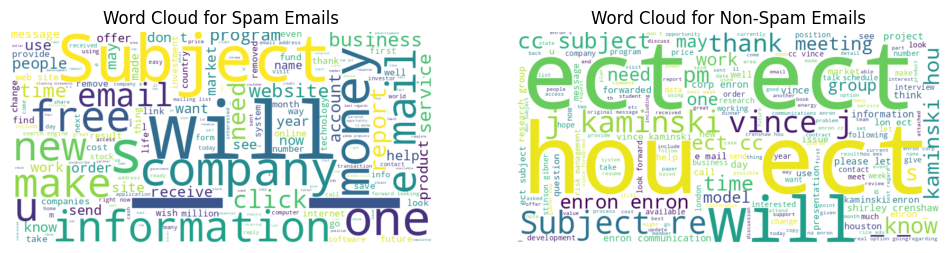

In [ ]:
from wordcloud import WordCloud

# Separate spam and non-spam emails
spam_emails = df[df.spam == 1]['text'].str.cat(sep=' ')
non_spam_emails = df[df.spam == 0]['text'].str.cat(sep=' ')

# Generate word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_emails)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')

plt.subplot(1, 2, 2)
wordcloud_non_spam = WordCloud(width=800, height=400, background_color='white').generate(non_spam_emails)
plt.imshow(wordcloud_non_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Spam Emails')

plt.show()


In [ ]:
#######################################################                         SECOND_CODE

!pip install xgboost
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import string
from nltk.stem import PorterStemmer

# 1--> Data Collection
emails_df = pd.read_csv('/content/sample_data/emails.csv')

# 2--> Data Cleaning
emails_df.dropna(inplace=True)

# 3--> Text Preprocessing (Tokenization, stopword removal)
custom_stopwords = set([
    'the', 'is', 'in', 'and', 'to', 'of', 'a', 'with', 'that', 'this', 'for', 'on', 'it', 'as', 'an', 'be', 'at',
    'by', 'or', 'from', 'but', 'not', 'are', 'we', 'you', 'he', 'she', 'they', 'i', 'your', 'his', 'her', 'my'
])

stemmer = PorterStemmer()

def basic_preprocess(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    processed_tokens = [stemmer.stem(word) for word in tokens if word not in custom_stopwords]
    return ' '.join(processed_tokens)

emails_df['processed_text'] = emails_df['text'].apply(basic_preprocess)

# 4--> Model Building
X_train, X_test, y_train, y_test = train_test_split(emails_df['processed_text'], emails_df['spam'], test_size=0.3, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_predictions = rf_model.predict(X_test_tfidf)

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_predictions = xgb_model.predict(X_test_tfidf)

# 5--> Model Evaluation (Accuracy, Precision, Recall, F1-Score)
# Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

# 6-->Email Classification Function
import matplotlib.pyplot as plt
def classify_email():

    email_to_classify = input("Please enter the email text: ")
    email_text = email_to_classify.lower().translate(str.maketrans('', '', string.punctuation)).split()
    email_text = [stemmer.stem(word) for word in email_text if word not in custom_stopwords]
    email_text = ' '.join(email_text)

    X_email = tfidf_vectorizer.transform([email_text])

    prediction = rf_model.predict(X_email)

    print("Spam\n\n" if prediction == 1 else "Not Spam\n\n")

def visualize_spam_distribution():
    num_spam_emails = len(emails_df[emails_df['spam'] == 1])
    num_not_spam_emails = len(emails_df[emails_df['spam'] == 0])

    total_emails = num_spam_emails + num_not_spam_emails
    spam_percentage = (num_spam_emails / total_emails) * 100
    not_spam_percentage = (num_not_spam_emails / total_emails) * 100
    labels = ['Spam', 'Not Spam']
    sizes = [num_spam_emails, num_not_spam_emails]
    colors = ['gray', 'pink']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Spam & Not Spam Distribution')

    plt.show()
classify_email()
visualize_spam_distribution()
# Random Forest
print("\n\nRandom Forest Model:")
print("Accuracy:" , rf_accuracy)
print("Precision:" , rf_precision)
print("Recall:" , rf_recall)
print("F1 Score:" , rf_f1)

# XGBoost
print("\nXGBoost Model:")
print("Accuracy:" , xgb_accuracy)
print("Precision:" , xgb_precision)
print("Recall:" , xgb_recall)
print("F1 Score:" , xgb_f1)


In [ ]:

from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_test_tfidf)

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

print("\n\nRandom Forest Model:")
print("Accuracy:" , lr_accuracy)
print("Precision:" , lr_precision)
print("Recall:" , lr_recall)
print("F1 Score:" , lr_f1)


In [ ]:
lr_f1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
dt_predictions = dt_model.predict(X_test_tfidf)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print("\n\nRandom Forest Model:")
print("Accuracy:" , dt_accuracy)
print("Precision:" , dt_precision)
print("Recall:" , dt_recall)
print("F1 Score:" , dt_f1)


In [ ]:
dt_f1

In [ ]:
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'XGBoost', 'Decision Tree', 'Logistic Regression']
accuracy_scores = [rf_accuracy, xgb_accuracy, dt_accuracy, lr_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['lightblue', 'gray', 'lightgreen', 'pink'])
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Email Spam Classification Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()